In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

 **Data Loading**

In [3]:
data = pd.read_csv('AirQualityUCI.csv')

In [5]:
df = pd.DataFrame(data)

In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


In [11]:
df.shape

(9357, 15)

In [13]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [15]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [19]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [21]:
# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [23]:
# Replace -200 with NaN
data.replace(-200, np.nan, inplace=True)

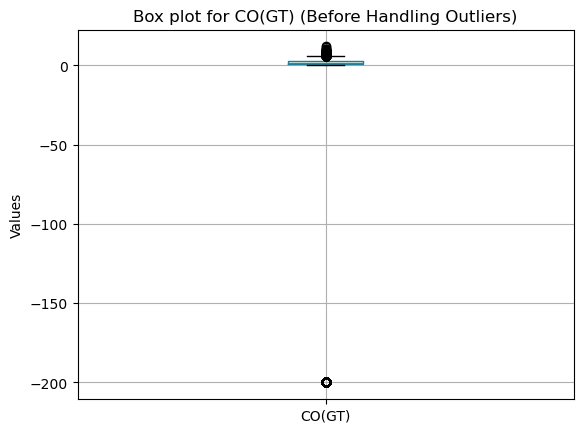

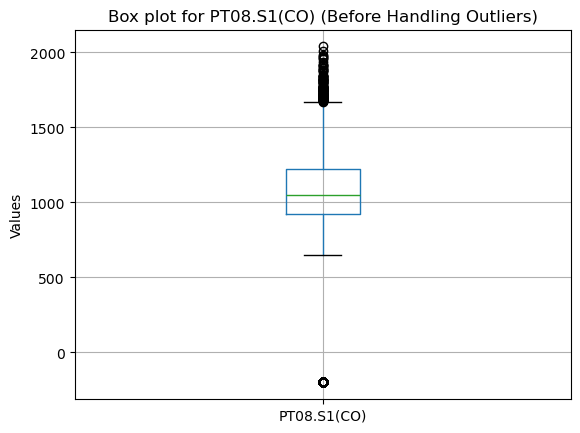

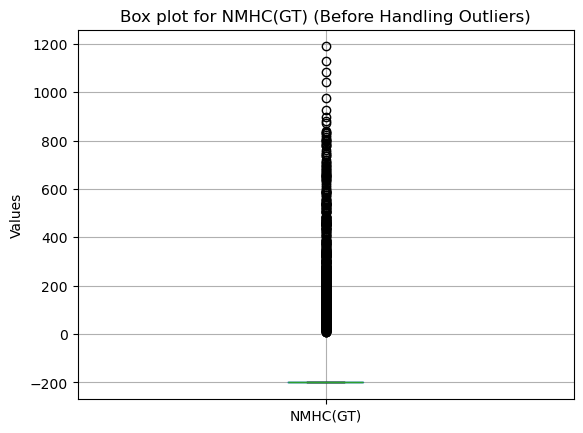

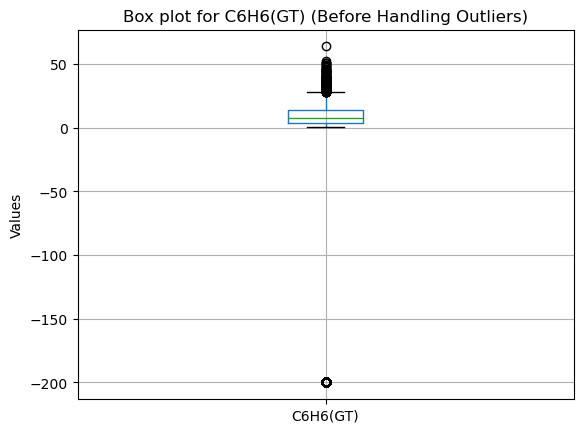

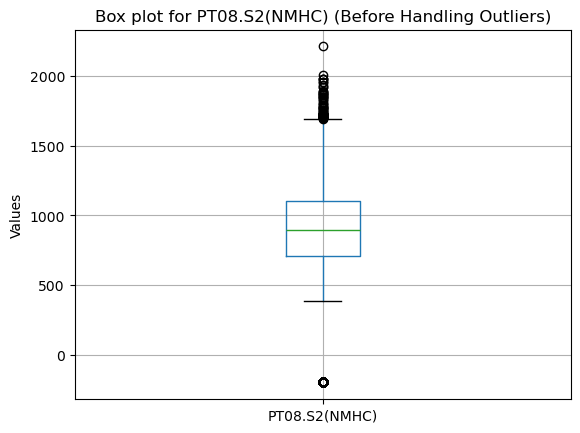

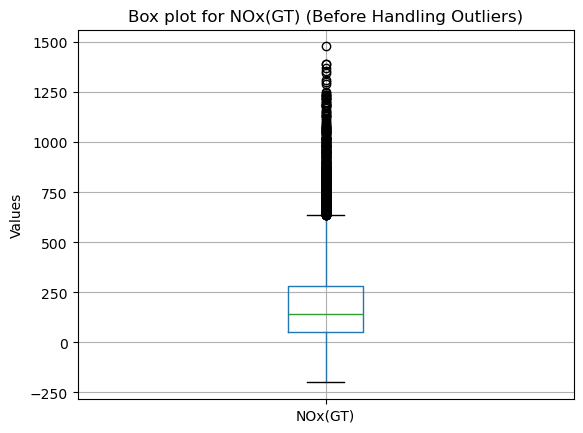

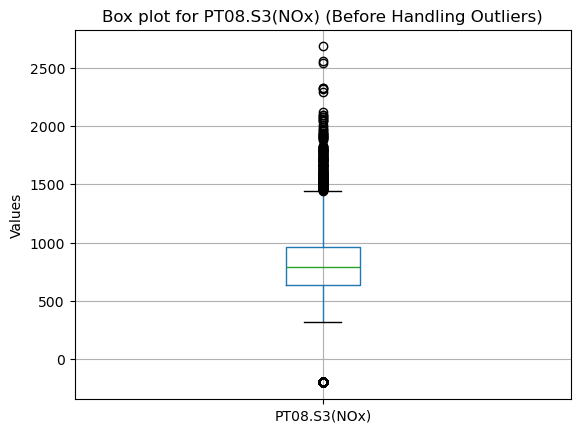

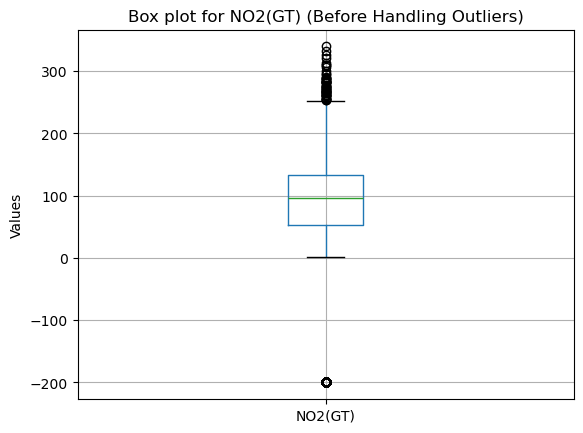

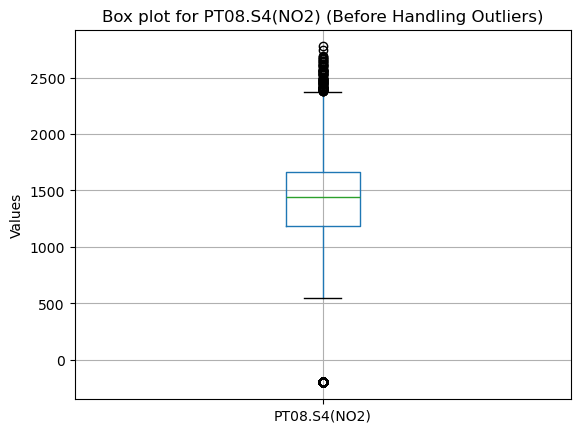

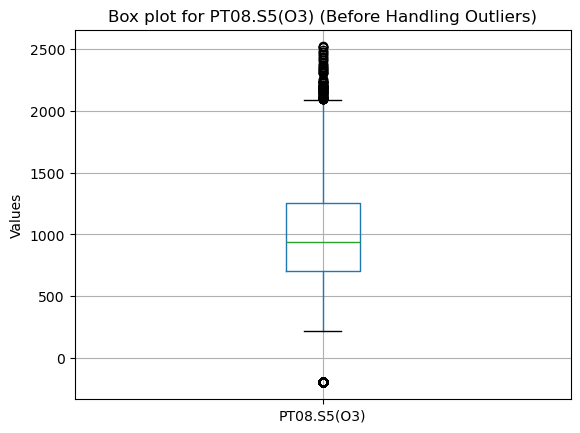

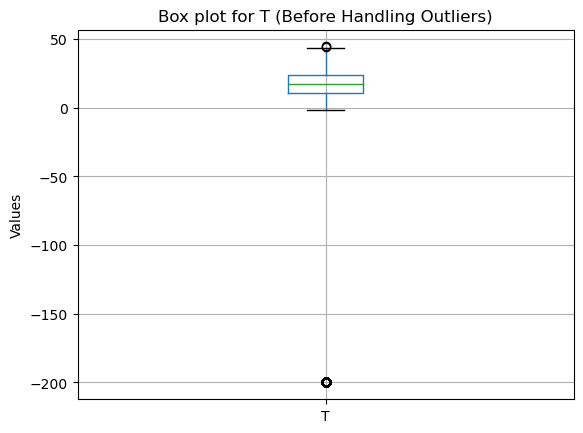

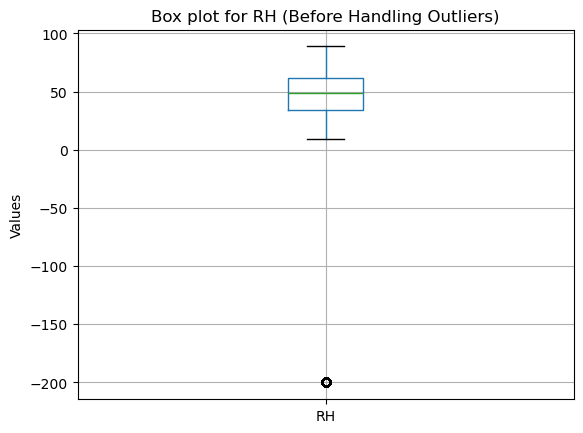

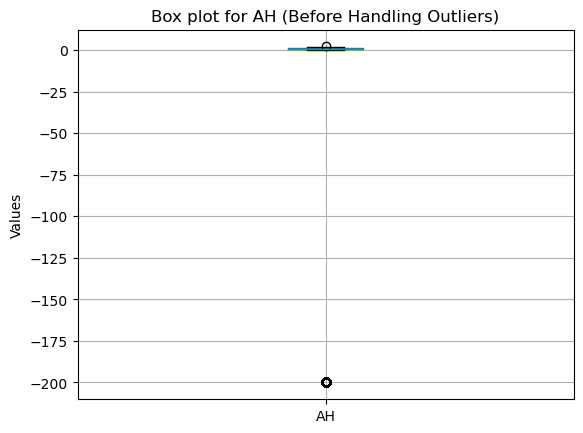

In [25]:
#Visualize outliers before handling 
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (Before Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

In [26]:
def handle_outlier(df):
    
    df = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        
        df[column] = df[column].apply(lambda x: 
                                      lower if x < lower else 
                                      upper if x > upper else x)
    return df

In [27]:
df1 = handle_outlier(df)

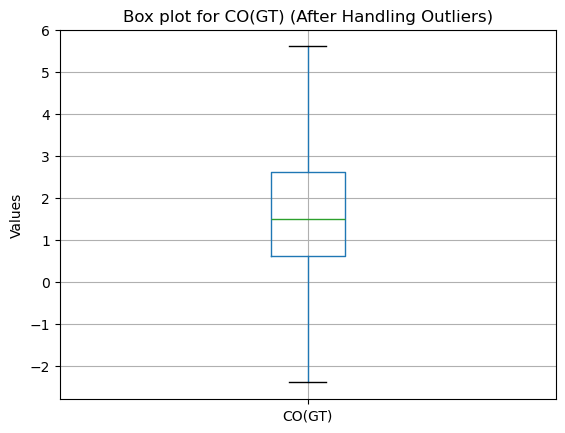

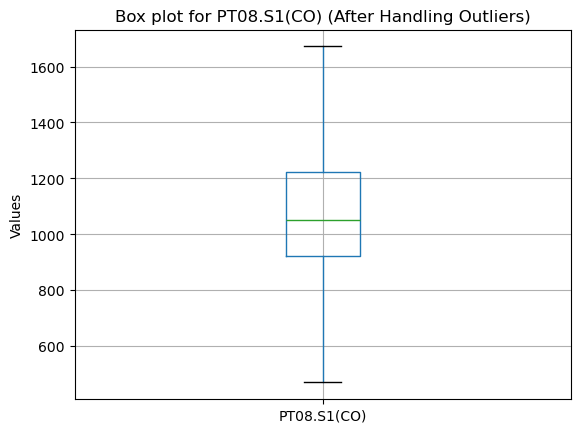

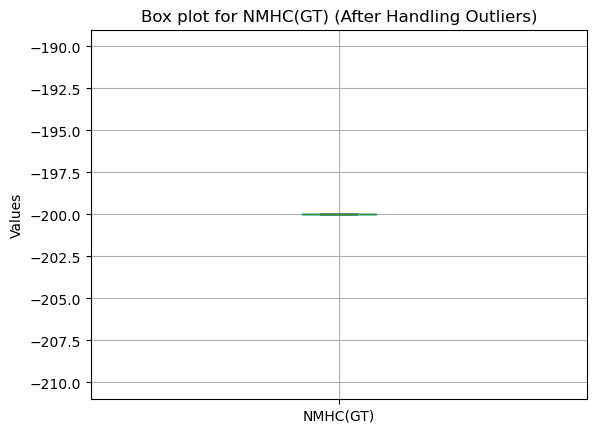

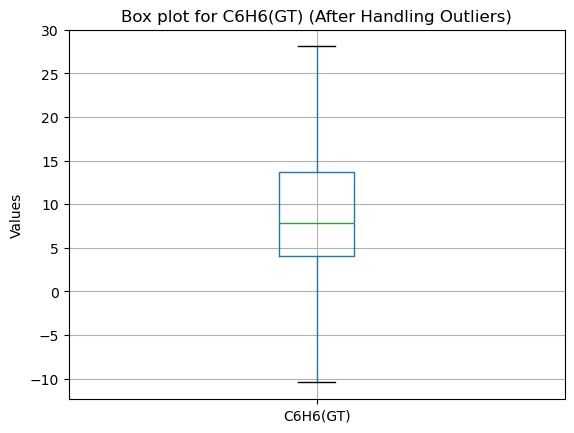

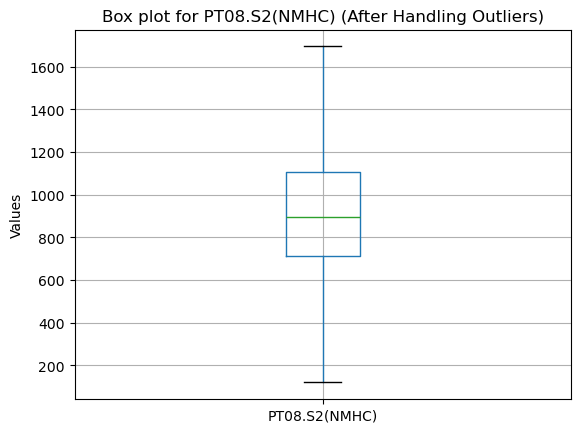

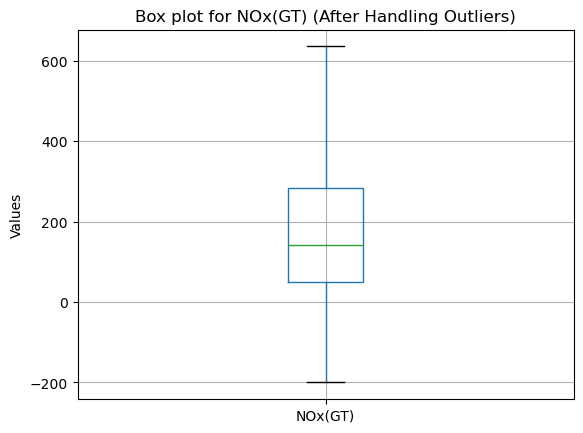

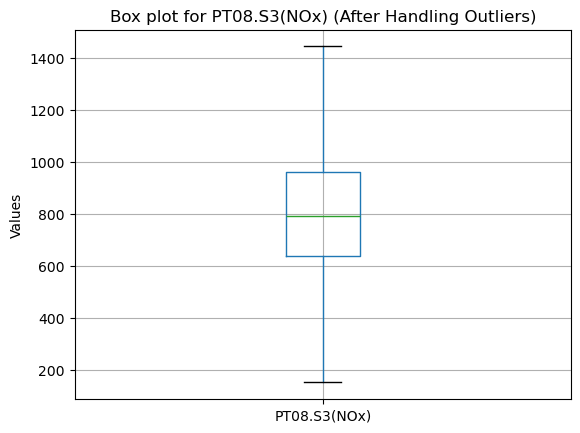

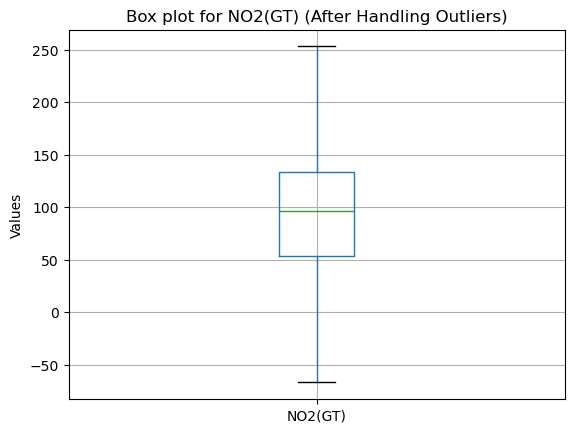

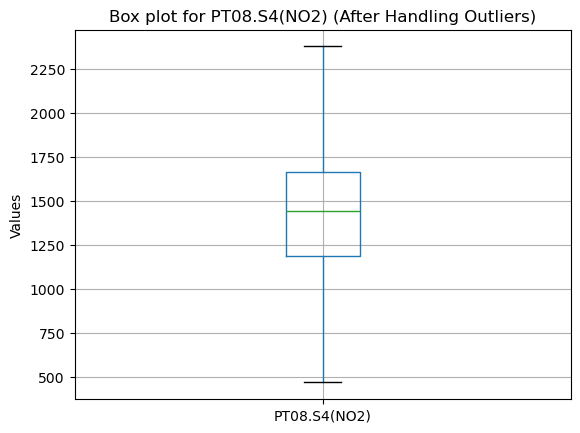

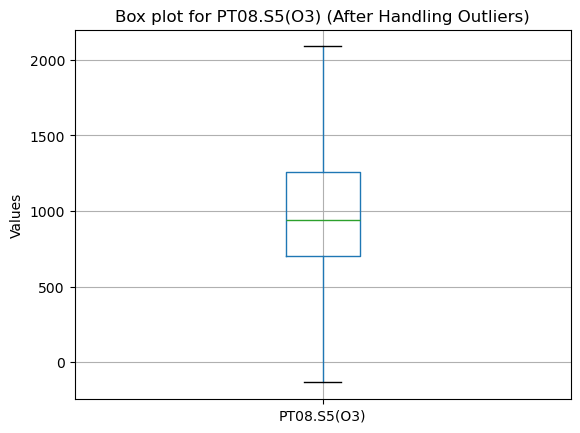

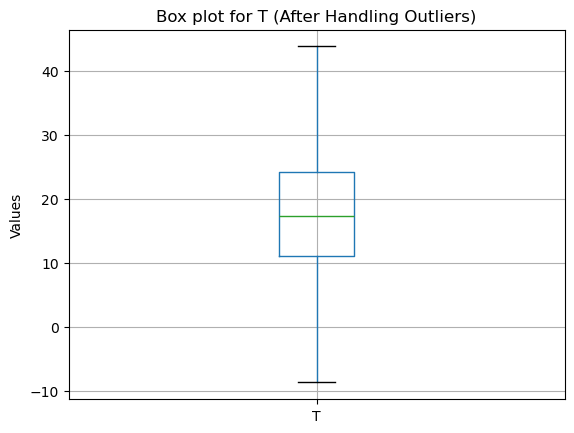

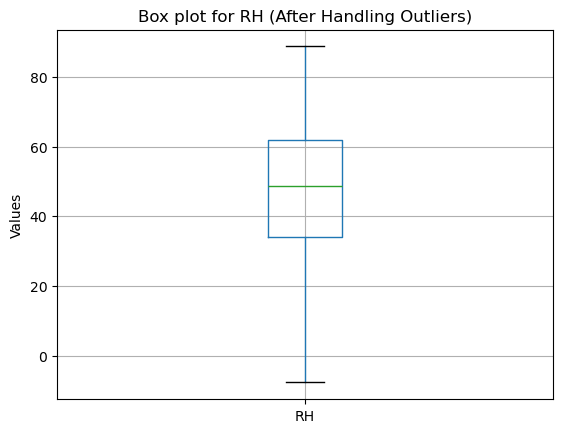

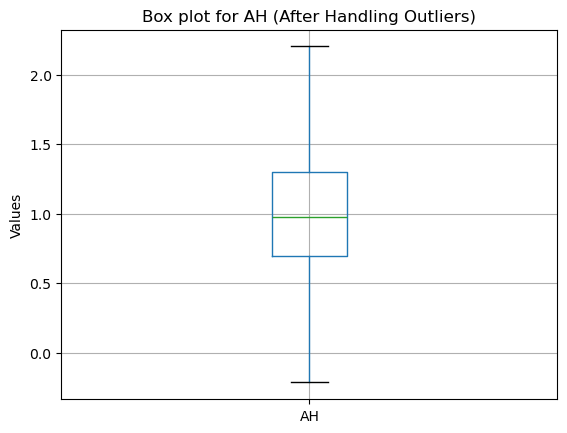

In [28]:
#Visualize outliers after handling 
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (After Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

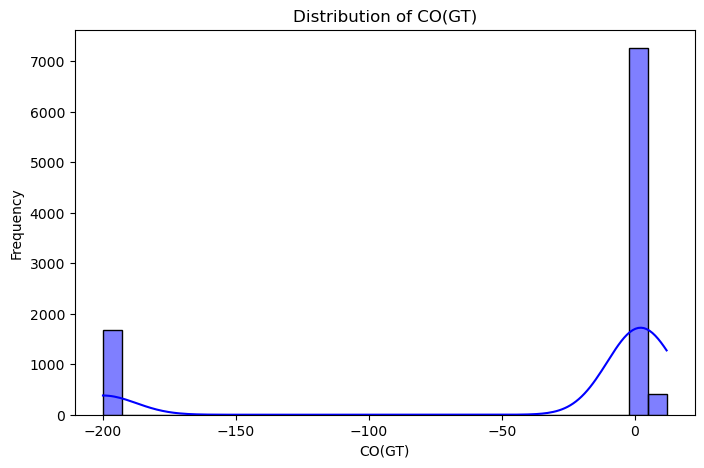

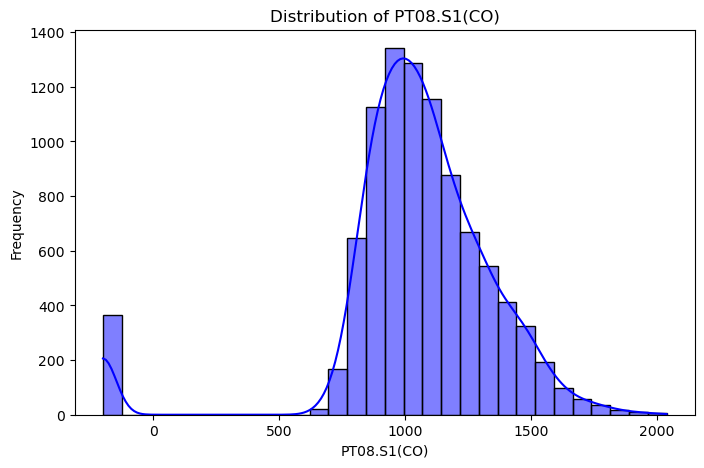

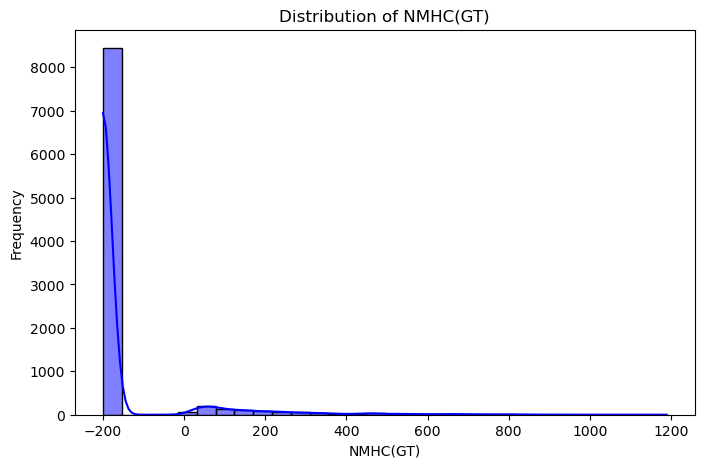

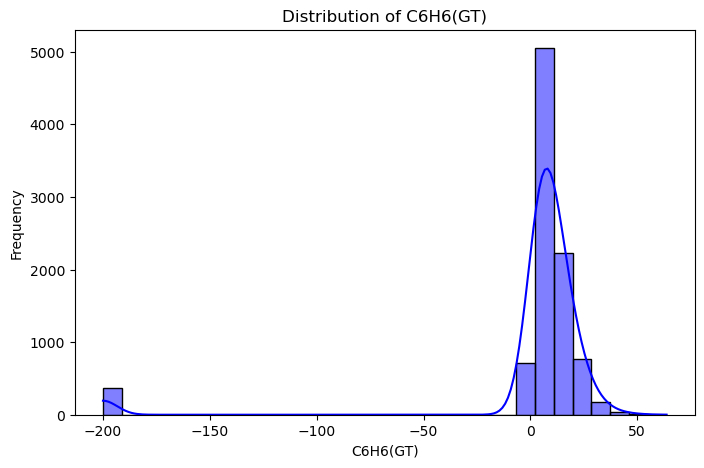

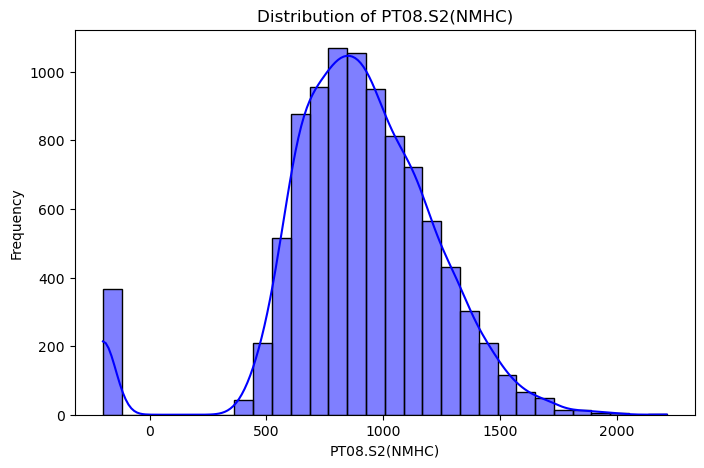

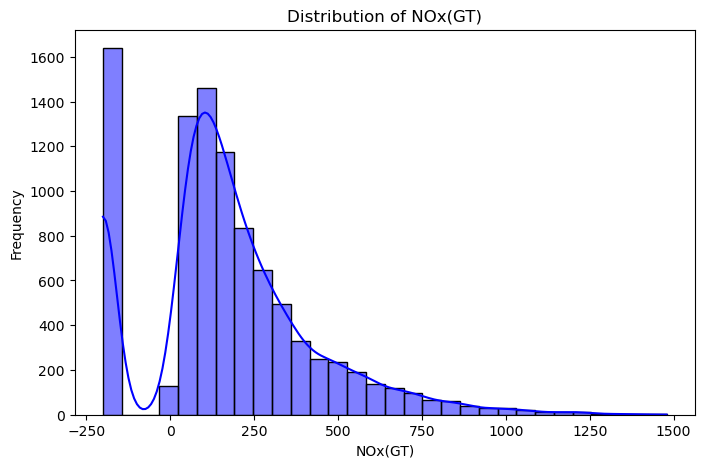

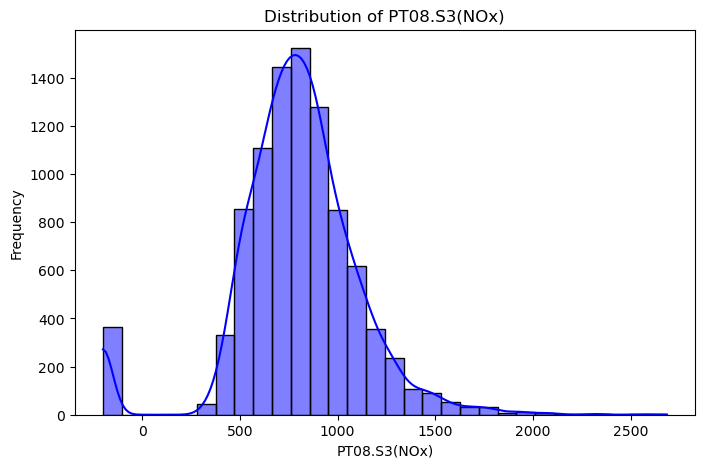

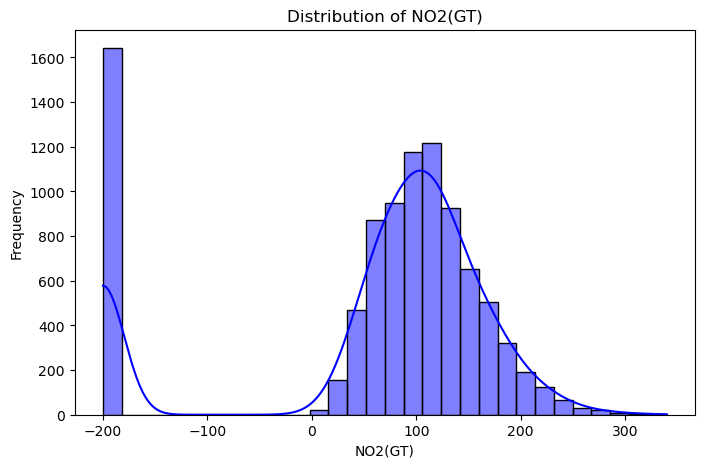

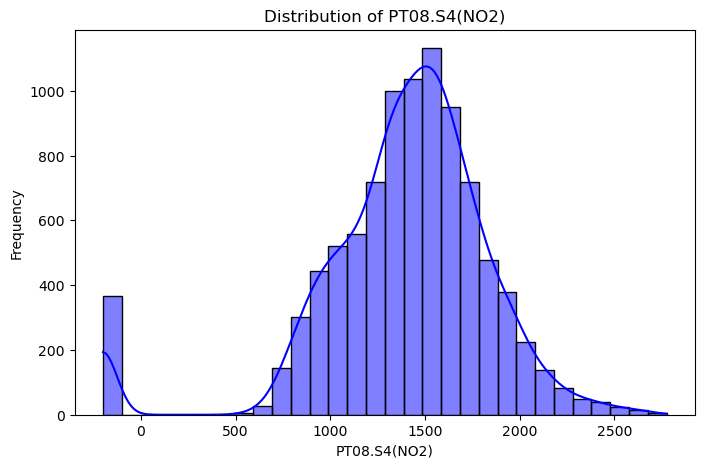

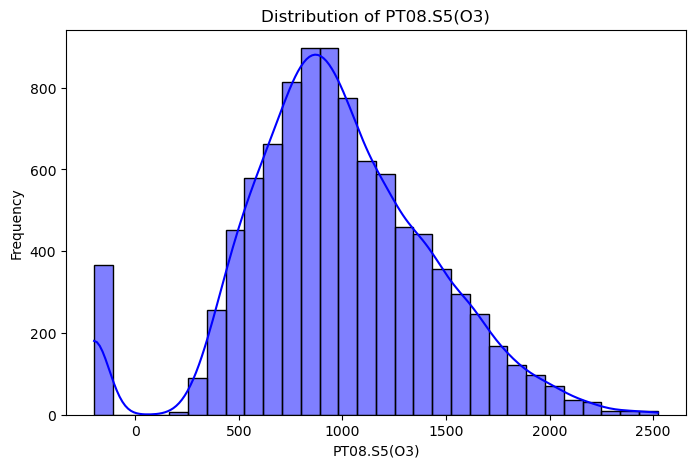

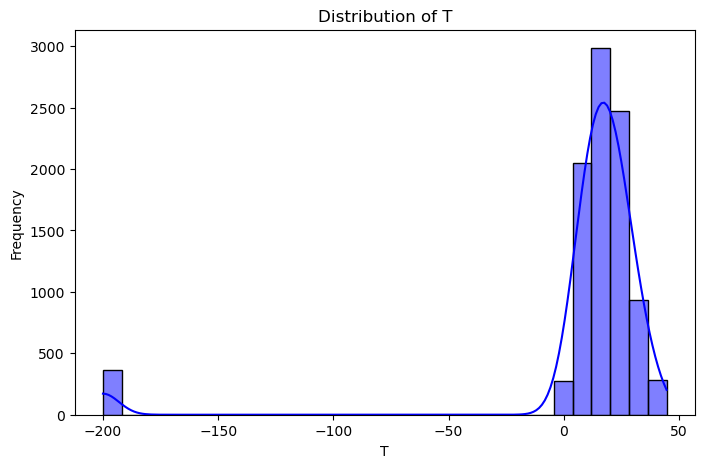

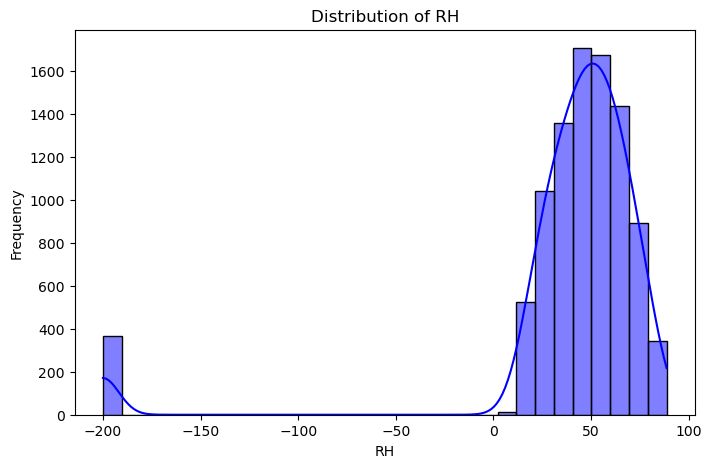

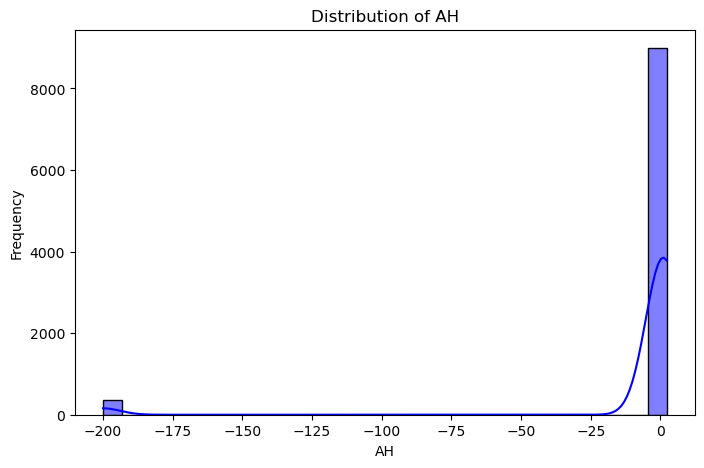

In [29]:
#Plot distribution for numeric columns 
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [30]:
numeric_data = df.select_dtypes(include=['float64','int64'])

In [31]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432


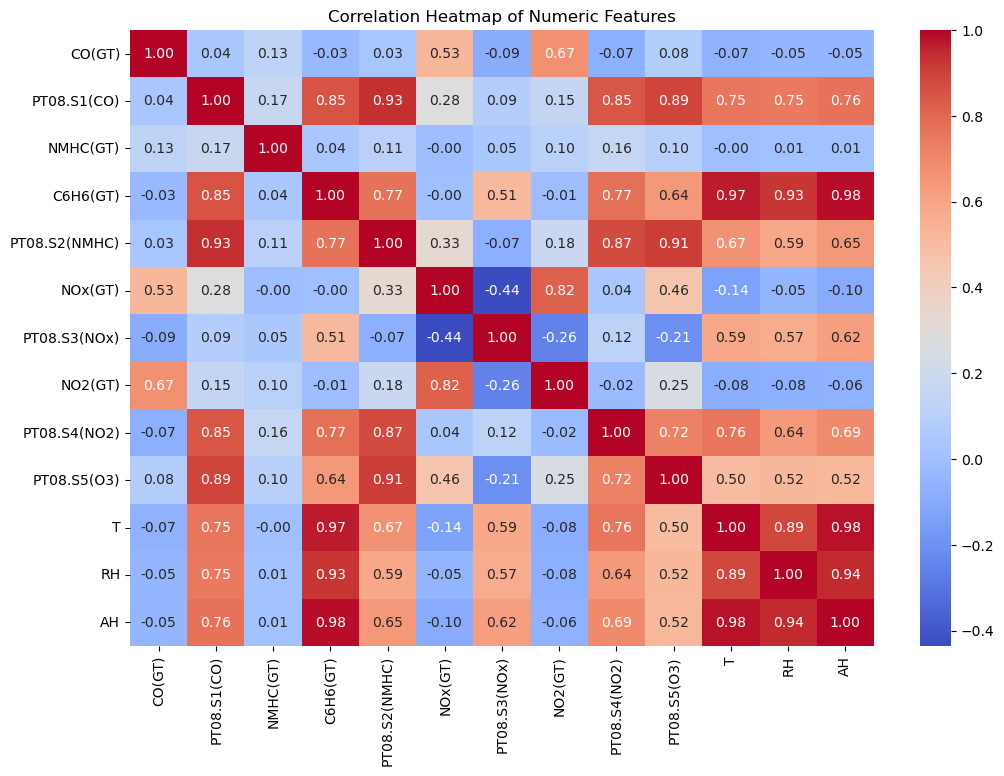

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [52]:
target = 'CO(GT)'

In [54]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
X = numeric_data.drop(columns=[target])
y = numeric_data[target]

In [42]:
from sklearn.impute import SimpleImputer

In [56]:
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
X_imputed = imputer.fit_transform(X)

In [58]:
valid_rows = y.notna()  # Identify valid rows
X_imputed_dropped = X_imputed[valid_rows]  # Filter rows in X_imputed
y_dropped = y[valid_rows]

In [60]:
X_ready, y_ready = X_imputed_dropped, y_dropped

In [62]:
k = 10  # Number of features to select (adjust as needed)
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_ready, y_ready)

In [64]:
# Retrieve selected feature names
selected_features = numeric_data.columns[:-1][selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

In [66]:
# Output the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'RH'],
      dtype='object')


In [74]:
# Splitting the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y_ready, test_size=0.2, random_state=42)  

In [76]:
# Initializing the StandardScaler  
scaler = StandardScaler()  

In [78]:
# Fitting the scaler on the training data and transforming both training and testing data  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [80]:
# Optional: Output the shape of the scaled data  
print("X_train shape:", X_train_scaled.shape)  
print("X_test shape:", X_test_scaled.shape)  

X_train shape: (6139, 10)
X_test shape: (1535, 10)
